# Finch Carr - Lab 04
## Problem 1

In [1]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [3]:
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
data = np.array(hf.get('data'))

In [5]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [6]:
hf.close()

### Problem 1.1)
- Now I have downloaded the data from the course website (gammaray_lab4.h5), and imported it into my working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. I want to make a few plots, generally exploring my data and make sure I understand it. I want to give a high level description of the data features I see as well. I want to specifically determine whether I see signal contamination in my data, and how I plan to build a background pdf().
  - What will my data look like if I plot every 10,000th time measurement (in gps seconds) on the x-axis and every 10,000th gamma-ray counts as my y-axis?

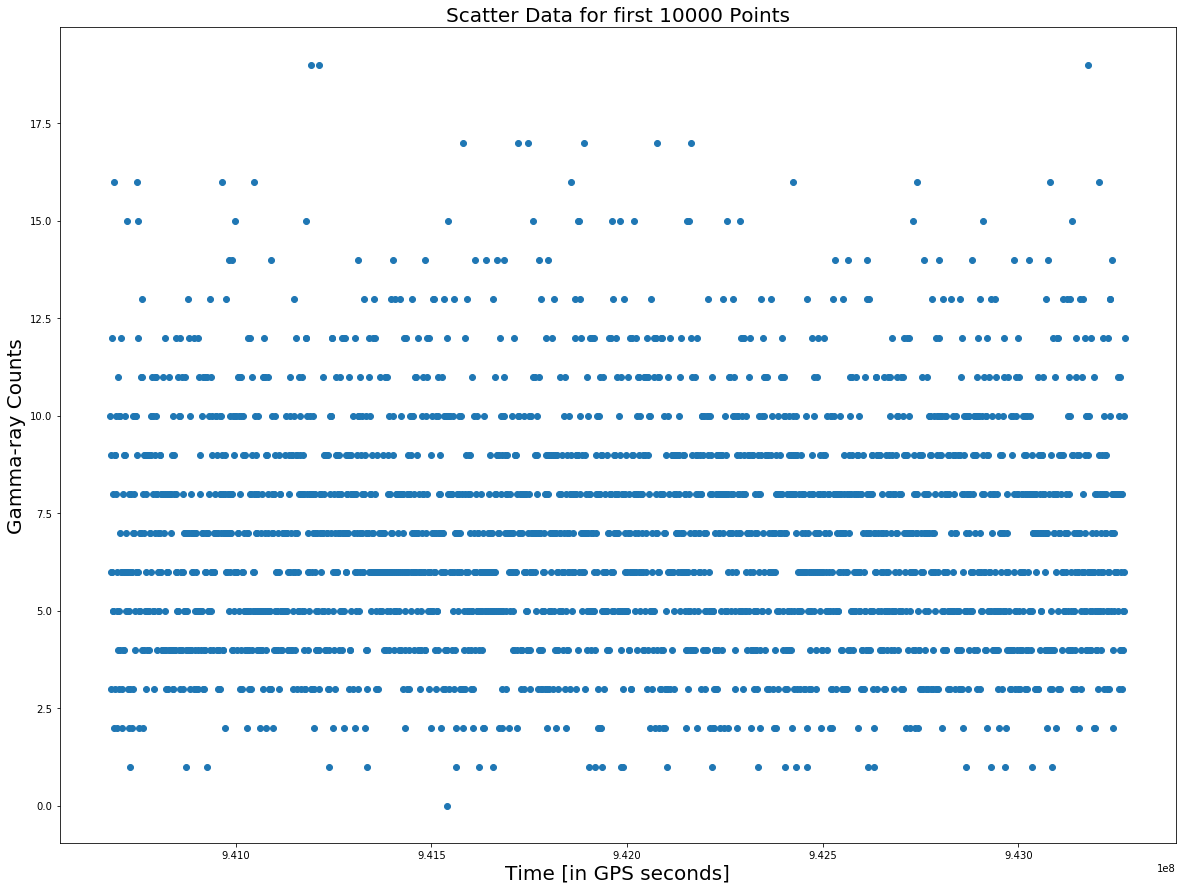

30.0

In [37]:
# Define the data points for every 10000 elements of 'data' array for the right columns
timeGPS = data[0,::10000]
gamma = data[3,::10000]

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(timeGPS, gamma)
plt.xlabel('Time [in GPS seconds]', size =20)
plt.ylabel('Gamma-ray Counts', size=20)
plt.title('Scatter Data for first 10000 Points', size=20)
plt.show()
data[3,::].max()

- What if I plot the gamma ray count on the y-axis against the solar phase in degrees on the x-axis?

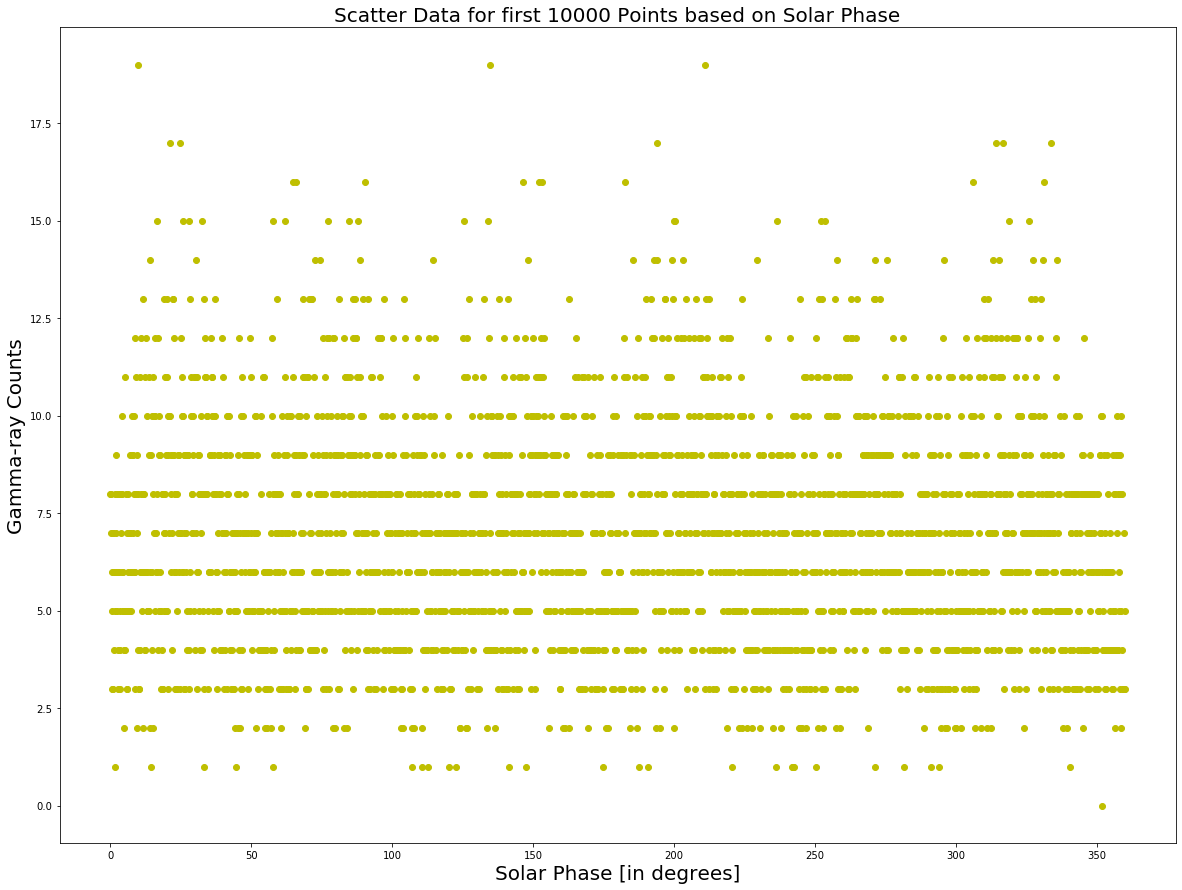

In [42]:
# Define the data points for every 10000 elements of 'data' array for the correct columns
solarphase = data[1,::10000]

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(solarphase, gamma, c='y')
plt.xlabel('Solar Phase [in degrees]', size=20)
plt.ylabel('Gamma-ray Counts', size=20)
plt.title('Scatter Data for first 10000 Points based on Solar Phase', size=20)
plt.show()

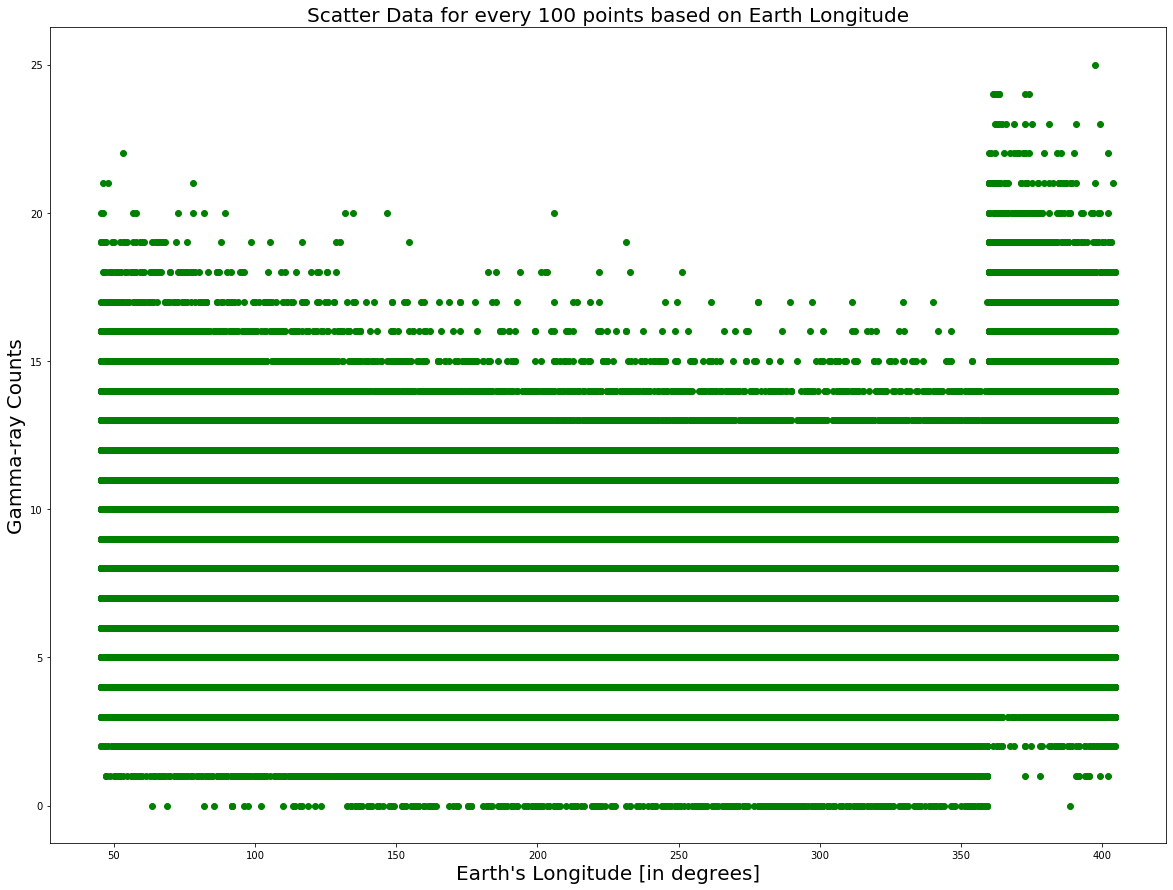

In [43]:
# Define the data points for every 1000 elements of 'data' array for the correct columns
longitude = data[2,::100]+45
y1000 = data[3,::100]
fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(longitude, y1000, c='g')
plt.title('Scatter Data for every 100 points based on Earth Longitude', size=20)
plt.xlabel('Earth\'s Longitude [in degrees]', size=20)
plt.ylabel('Gamma-ray Counts', size=20)
plt.show()

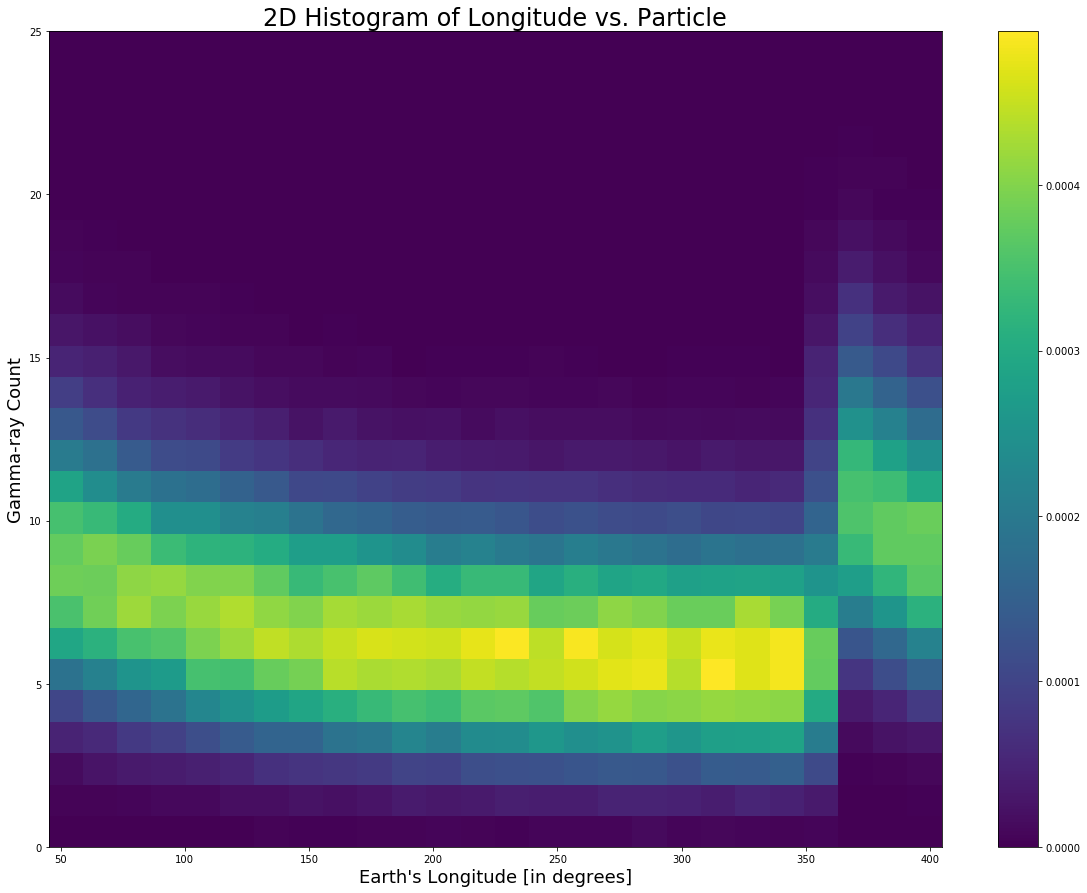

In [10]:
a = np.vstack((longitude, y1000))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=(26), density=True)
plt.title("2D Histogram of Longitude vs. Particle", fontsize = 24)
plt.ylabel("Gamma-ray Count", fontsize = 18)
plt.xlabel("Earth's Longitude [in degrees]", fontsize = 18)
plt.colorbar(h[3], ax=ax)

- To have a time dependent axis, I want to use a modulo operator on my time column such that I have one time axis equal to one orbit (5400 seconds) (i.e. equal to one full rotation of Earth's longitude which is equivalent to 360 degrees)
- The gamma counts for every orbit are plotted against the time they occured at in their respective orbit, anywhere from 0 to 5400 seconds

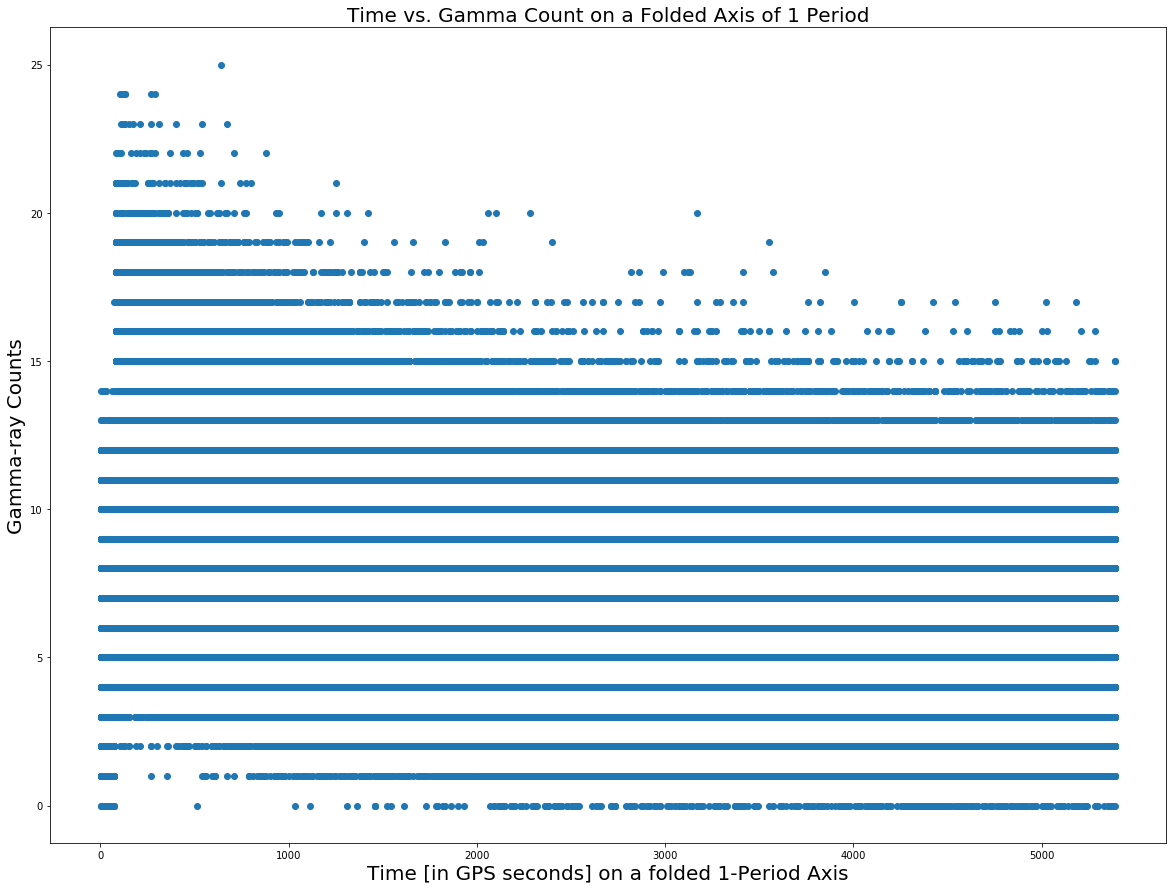

In [45]:
# Define the data points for every 100 elements of 'data' array for the right columns
timeGPSfold = (data[0,::100]-3985) % 5400
gamma = data[3,::100]

fig, ax = plt.subplots(1,1)
#plt.yscale('log')
ax.scatter(timeGPSfold, gamma)
plt.title('Time vs. Gamma Count on a Folded Axis of 1 Period', size=20)
plt.xlabel('Time [in GPS seconds] on a folded 1-Period Axis', size=20)
plt.ylabel('Gamma-ray Counts', size=20)
plt.show()

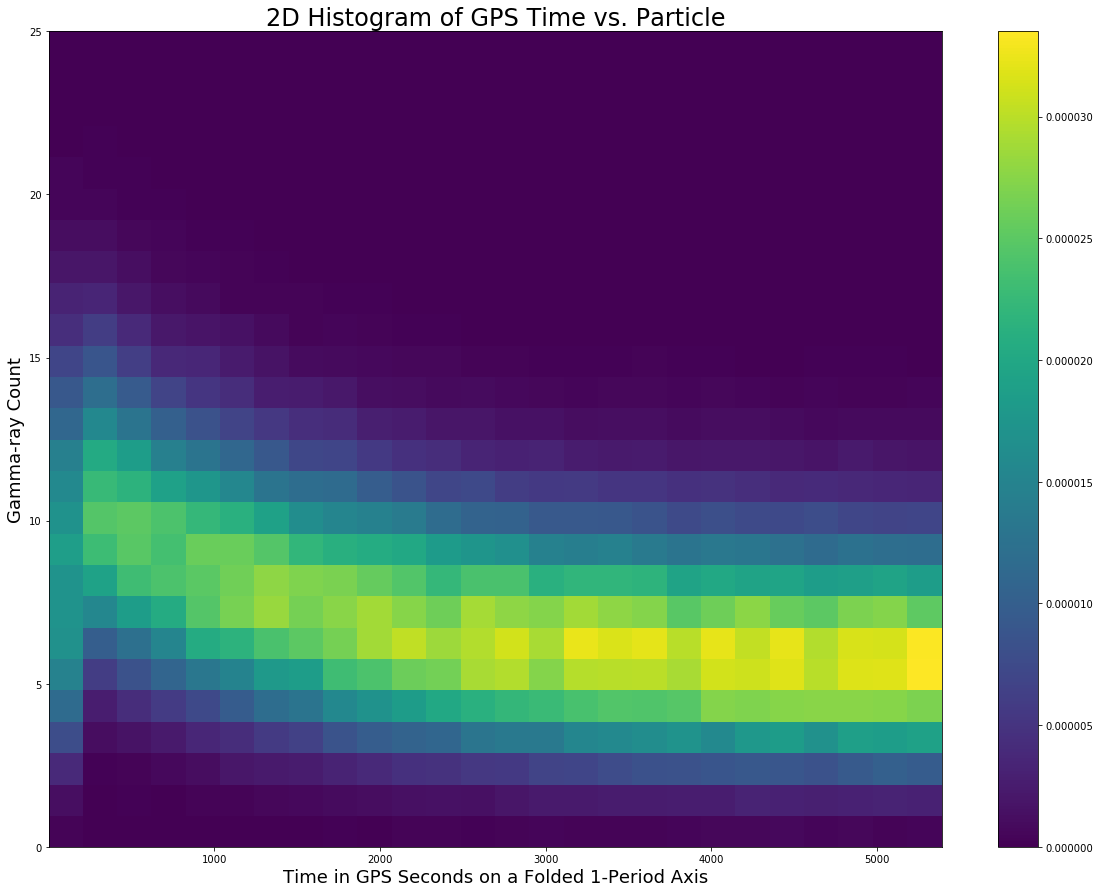

In [12]:
b = np.vstack((timeGPSfold, y1000))
b.shape
fig, ax = plt.subplots(1, 1)

h = ax.hist2d(b[0,:], b[1,:], bins=(26), density=True)
plt.title("2D Histogram of GPS Time vs. Particle", fontsize = 24)
plt.xlabel("Time in GPS Seconds on a Folded 1-Period Axis", fontsize = 18)
plt.ylabel("Gamma-ray Count", fontsize = 18)
plt.colorbar(h[3], ax=ax)

- I  plotted a folded x-axis scatter plot and 2D histogram that folded each individual period of 1 orbit and plotted the gamma counts during each period on top of one another. This showed the same pattern in the data as the Longitude vs. Gamma Count graph.
  - The pattern in the data shows a recurring rising spike where gamma count $\gamma = 20 - 25$ counts *(shown distinctly by the scatterplot above)* and then a cooldown of the gamma count for the remaining duration of the satellite's orbit to a final range of $\gamma = 5 - 10$ counts *(shown distinctly by both the above scatterplot and 2D histogram)*, and we have defined the beginning of each orbit, $t=0$, to correlate to the spike in gamma-count, and the end of each orbit to be $90x60$ seconds after $t=0$, at $t=5400$ seconds.
  
### Problem 1.2)
- I defined the signal contamination I saw as occurring in the form of a periodic spike of gamma counts in my dataset at the beginning of each respective orbit which is affecting the overall distribution of my data. 
- I can build a background pdf() for the spike with decreasing value over time affecting my data set by fitting a pdf() to the mean values of the gamma count data $\gamma$ on my folded axes plot, where all gamma counts are plotted on one full orbit lasting $\Delta t=5400$ seconds, then repeating. I can then compare the fit to the actual distribution and adjust as necessary until I have a background pdf() function.

### Problem 1.3)
- Since the gamma count distribution in my dataset consists solely of discrete integer values, the background distribution of data is most likely a discrete distribution. I can test that theory by studying the distribution, plotting PMF and PDF fits for discrete and continuous functions respectively, and comparing them to the data distribution to see which fit is more accurate. 
  - If I were to use the stats.gamma.fit() function on my data, I could find approximate values for scale and loc for my distribution, even if the distribution is neither continuous nor gamma-distributed!

Gamma Fit Parameters:
    a = 10.57393069842126
    loc = -2.7393185309938946
    scale = 0.9304078074487563
    mean = 7.098749619021532


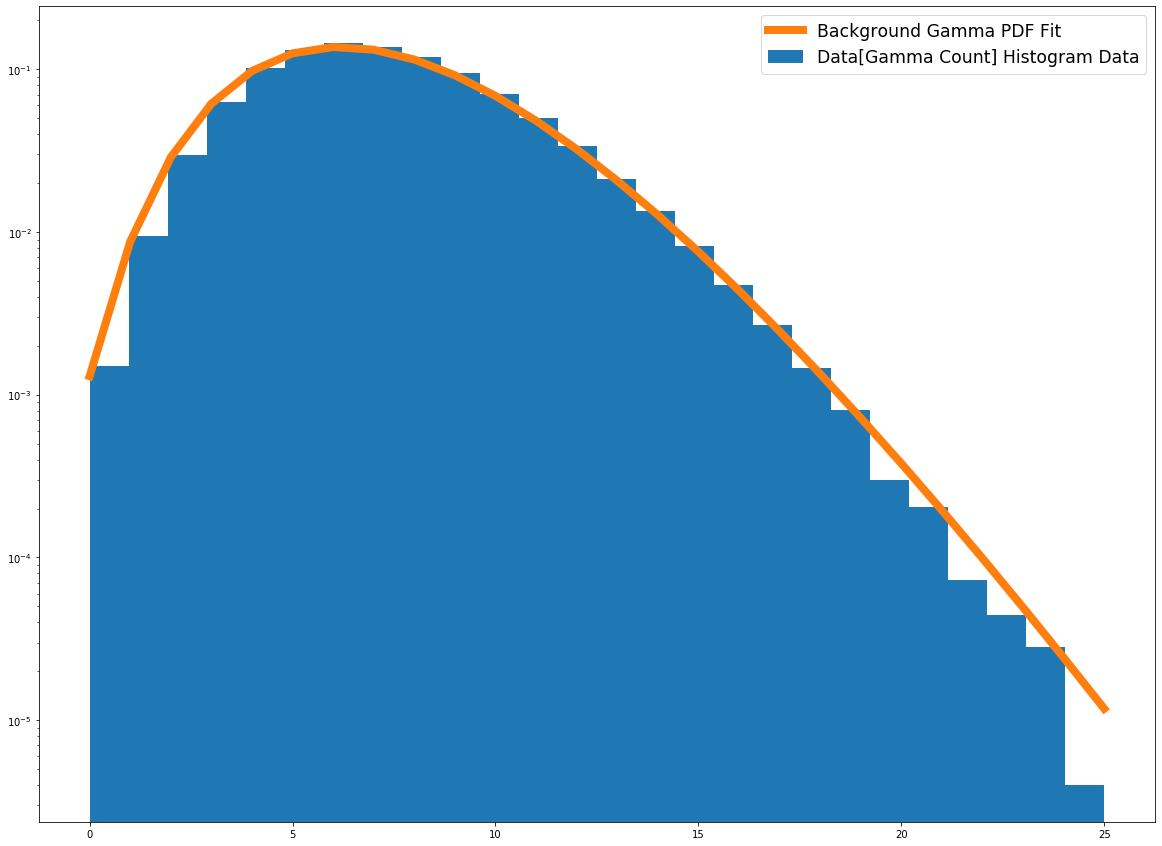

In [13]:
#Studying my distribution tells me that I could find specific values for scale and loc using a gamma fit function, which 

gamma = data[3,::100]
gammaSorted = np.sort(data[3,::100])
fig, ax = plt.subplots(1,1)
plt.yscale('log')


ax.hist(gammaSorted, 26, density=True, label='Data[Gamma Count] Histogram Data')

fit_alpha, fit_loc, fit_beta=stats.gamma.fit(gammaSorted)
print('Gamma Fit Parameters:')
print(f'    a = {fit_alpha}')
print(f'    loc = {fit_loc}')
print(f'    scale = {fit_beta}')
print(f'    mean = {gammaSorted.mean()}')

axplot = ax.plot(gammaSorted, stats.gamma.pdf(gammaSorted, a=fit_alpha, 
                                              loc=fit_loc, scale=fit_beta), 
                 lw=8, label='Background Gamma PDF Fit')


ax.legend(loc='best', fontsize='xx-large')
plt.show()

- We fit a gamma distribution PDF to the measurment of counts of gamma-rays and cosmic rays in our dataset, and we found a PDF of that fit function which we plotted against the histogram of probabilities of every 100th data point in our dataset, which were sorted after being picked from the dataset and then plotted into integer amount of bins from 0 to 24, which is chosen because the counts are plotted on the x-axis in integer amounts, so every count can then be plotted into an individual bin for that specific count value
  - Our background distribution over the entire dataset (i.e. multiple orbits) is probably not gamma-distributed since it is only ever outputting discrete integer values in the form of gamma counts, so we can apply the logic to each individual orbit of data in our dataset that for every orbit (5400 seconds) of collected data, there is a discretely distributed background that contaminates our incoming signal of gamma-ray counts for that orbit.
  - The background of our dataset is not consistent across the dataset because the data follows a periodic trend that repeats with every orbit of 5400 GPS seconds (i.e. 90 minutes) and the satellite was found above to orbit a total of 480 times over 30 days. Since the total background can be assigned to a discrete PDF fit, any given measurement within any given singular orbit period, will also have a discretely distributed background.
- I want to examine the folded axis 2D histogram plot once more and see if discrete distribution functions like a Poisson distribution might apply to my specific dataset of gamma counts.

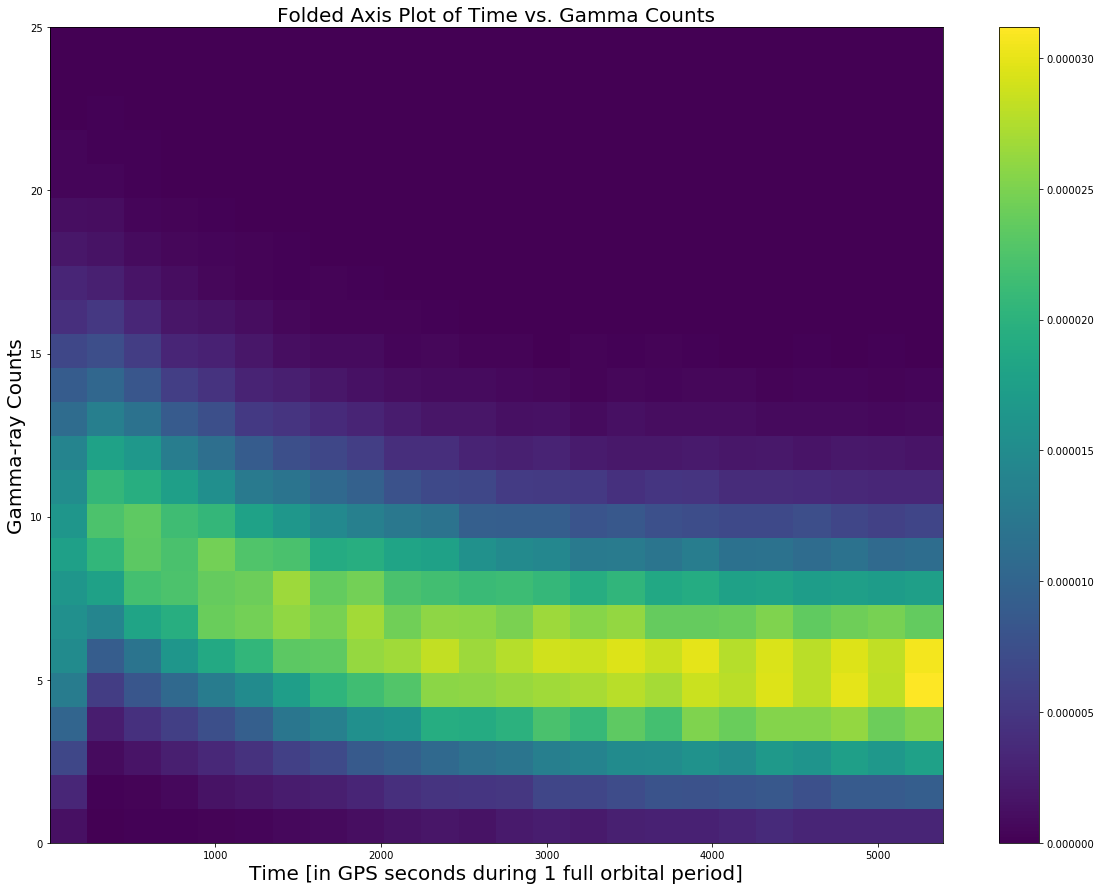

In [46]:
timeGPSfold = (data[0,::100]-3985) % 5400
gammafold = data[3,::100]

fig, ax = plt.subplots(1,1)

plot = plt.hist2d(timeGPSfold, gammafold, bins=24, density=True, cmap='viridis')
plt.colorbar(plot[3], ax=ax)
plt.title('Folded Axis Plot of Time vs. Gamma Counts', size=20)
plt.xlabel('Time [in GPS seconds during 1 full orbital period]', size=20)
plt.ylabel('Gamma-ray Counts', size=20)
plt.ylim(0,25,1)
plt.show()

- Looking at the distribution, the gamma output count is only integer values. In terms of Poisson distributions, I could define an axis of **k** occurences possible during any one orbit of measurements, or the folded plot of all orbits, where **k** ranges from 0 (minimum amount of counts during any measurement possible) to 40 (although my dataset only ever reaches 30 counts in any given measurement, I set the maximum on my axis to 40 to have a better idea of what the full distribution will look like)
  - For any Poisson function, the *loc* value is set at the minimum possible amount of measurements, so for my data, *loc*$=0$
  - For any Poisson function, the *mu* value is set at the expected amount of measurements during any given measurement, so for my data, $\mu=7$, since my gamma count data column has a mean value of $7.098$, but I can't expect exactly 7.098 counts on any measurement. I have to expect an integer number of counts, so I round $\mu$ to 7

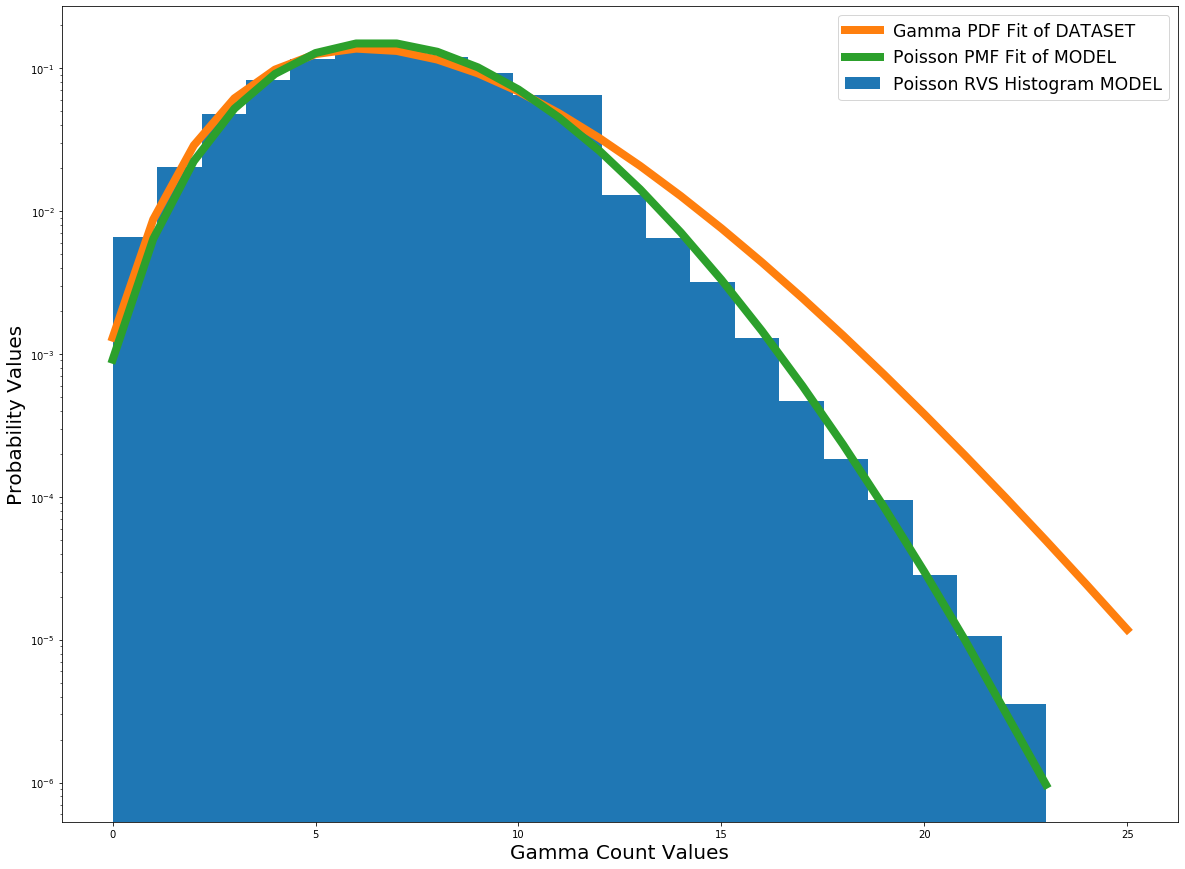

In [50]:
# Defining my k-axis (number of possible occurences of gamma counts)
kP = np.arange(0, 40, 1)

# Creating random variates that are Poisson-distributed with my data distribution's characteristics
Poisson1 = np.sort(stats.poisson.rvs(loc=0, mu=7, size=len(timeGPSfold)))

# Creating a PMF function of my random variates
ppmf = stats.poisson.pmf(Poisson1, loc=0, mu=7)

# I will plot the Gamma Data on a histogram, Poisson PMF as a line, and Gamma PDF as a line to compare the two fits
fig, ax = plt.subplots(1,1)
plt.yscale('log')

ax.hist(Poisson1, bins=21, density=True, label='Poisson RVS Histogram MODEL')

ax.plot(gammaSorted, stats.gamma.pdf(gammaSorted, a=fit_alpha, loc=fit_loc, 
                                     scale=fit_beta), lw=8, 
        label='Gamma PDF Fit of DATASET')

ax.plot(Poisson1, ppmf, lw=8, label='Poisson PMF Fit of MODEL')
plt.ylabel('Probability Values', size=20)
plt.xlabel('Gamma Count Values', size=20)
ax.legend(loc='best', fontsize='xx-large')
plt.show()

- Since the gamma count measurements are only integer values, I believe they are discretely distributed such that any measurement value taken at any point in orbit will always be an integer value. I think this distribution of data follows a Poisson distribution with values of expected value called $\lambda$ where $\lambda (AKA \mu) = 7.0$ which is the average gamma count measurement over the total dataset, and a k-axis of occurences such that any possible occurence of counts during the dataset can range from 0 to a number around 30 but no less then 30 (since my specific dataset of multiple orbits had several measurements of 30 gamma counts). 
  - The minimum k-value is 0 because I can't expect less than zero gamma counts for any given measurement. Getting negative counts would mean the experiment is physically flawed.
  - The maximum is 40 in my k-axis because while the maximum value in the dataset for gamma counts is 30, over more trials it could be found that (while unlikely) it is possible to get more than 30 gamma counts in any random second of measurement. It should be emphasized that getting any more than 20 gamma counts in any given second of measurement is extremely unlikely (as shown by the data distribution).
- I conclude that the gamma count distribution closely follows a Poisson distribution for any given orbital period.

In [16]:
Poisson1, np.sort(gammafold)

(array([ 0,  0,  0, ..., 21, 21, 22]),
 array([ 0.,  0.,  0., ..., 24., 24., 25.]))

- Here we can see a comparison of my Poisson-distributed random variates array and the folded-axis, sampled, gamma count array and I see that the max and min values possible are extremely similar. 
- In terms of comparing my model to the data, I think the model is an above average model, but could be refined to have more accurately distributed datapoints, as well as more closely positioned max values in comparison to the max values of my sampled data and the dataset in its entirety.

### Problem 1.4)
- Since the background of my data varies with time, 5-sigma detection values of gamma counts also change with time
  - A 5-sigma detection will require more gamma ray counts at the beginning of an orbit as compared to the middle. I want to find values for those gamma count detections and compare. 

In [17]:
# Find probability of getting 5 sigma detection for a standard normal distribution
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(sigma5)

# Plug that probability into the poisson distribution of variates such that each distribution corresponds to a range of values for 1 millisecond of time at different intervals
total5 = stats.poisson.ppf(1-sigma5, mu=7, loc=0)
print(total5)

gammaSpike = np.sort(gamma)[:259000:-1]
print(f'{gammaSpike.mean()} is the mean of the range of spike values, and its nearest integer value will be set as the mu value for a Poisson PPF to determine a 5 sigma measurement value')
spike5 = stats.poisson.ppf(1-sigma5, mu=20)
print(f'{spike5} is the value needed for a 5-sigma detection in the spike area of the gamma counts')

gammaLow = np.sort(gamma)[119800:120000:]
print(f'{gammaLow.mean()} is the mean of a range of values in the area of the flattened decline of the gamma count distribution, and its nearest integer value will be set as the mu value for a Poisson PPF to determine a 5 sigma measurement value')
low5 = stats.poisson.ppf(1-sigma5, mu=7)
print(f'{low5} is the value needed for a 5-sigma detection in the flattened, declining area of the gamma counts')

2.866515719235352e-07
24.0
20.58 is the mean of the range of spike values, and its nearest integer value will be set as the mu value for a Poisson PPF to determine a 5 sigma measurement value
46.0 is the value needed for a 5-sigma detection in the spike area of the gamma counts
7.0 is the mean of a range of values in the area of the flattened decline of the gamma count distribution, and its nearest integer value will be set as the mu value for a Poisson PPF to determine a 5 sigma measurement value
24.0 is the value needed for a 5-sigma detection in the flattened, declining area of the gamma counts


- So in the spiked area at the beginning of any given orbit of our dataset, a value of 46 gamma counts is required for a 5 sigma detection, but in the flattened area in the middle to end of every orbit, only 24 gamma counts are needed for a 5 sigma detection. 
- This is a decrease by almost a factor of 2 for the gamma counts needed for a 5 sigma detection for two individual intervals during any given orbit period, which is a significant decrease.

## Problem 2
### Problem 2.1)
- I need to set up my image data from *images.h5*

In [18]:
img = h5py.File('images.h5', 'r')

In [19]:
img.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [20]:
image1 = np.array(img.get('image1'))
stack = np.array(img.get('imagestack'))

In [21]:
hf.close()

### Problem 2.2) 
- I need to further explore my data to figure out what's going on, and to build a plan for calculating a background PDF

In [22]:
stack

array([[[-0.50492093,  0.24975188, -0.50405229, ..., -0.06210173,
          1.19841096, -0.5545422 ],
        [ 0.31347367,  0.51688201, -0.31138079, ...,  0.33398174,
          0.55016787, -0.34058838],
        [ 0.77349547,  0.67896143, -0.6113714 , ...,  0.27080669,
         -0.68046639,  0.18246055],
        ...,
        [-0.04589657,  0.97223818, -0.71404873, ...,  0.65576281,
         -0.54599168,  0.21560286],
        [-0.11759723,  0.62046056,  0.09021457, ..., -0.34188113,
          0.54884142, -0.08468977],
        [ 0.73567588,  0.03022051, -0.24726976, ..., -0.23116598,
         -0.26072648, -0.52367269]],

       [[-0.25288444,  0.40016073, -0.30428969, ..., -0.44263445,
          1.03162128,  0.09690978],
        [-0.29488745,  0.55482416,  0.42734028, ..., -0.4764485 ,
          0.69531261,  1.30498548],
        [-1.22944512, -0.42300837,  0.2854878 , ...,  0.07939523,
         -0.49463113,  0.22676201],
        ...,
        [-0.83559631, -0.56840005,  0.45623228, ...,  

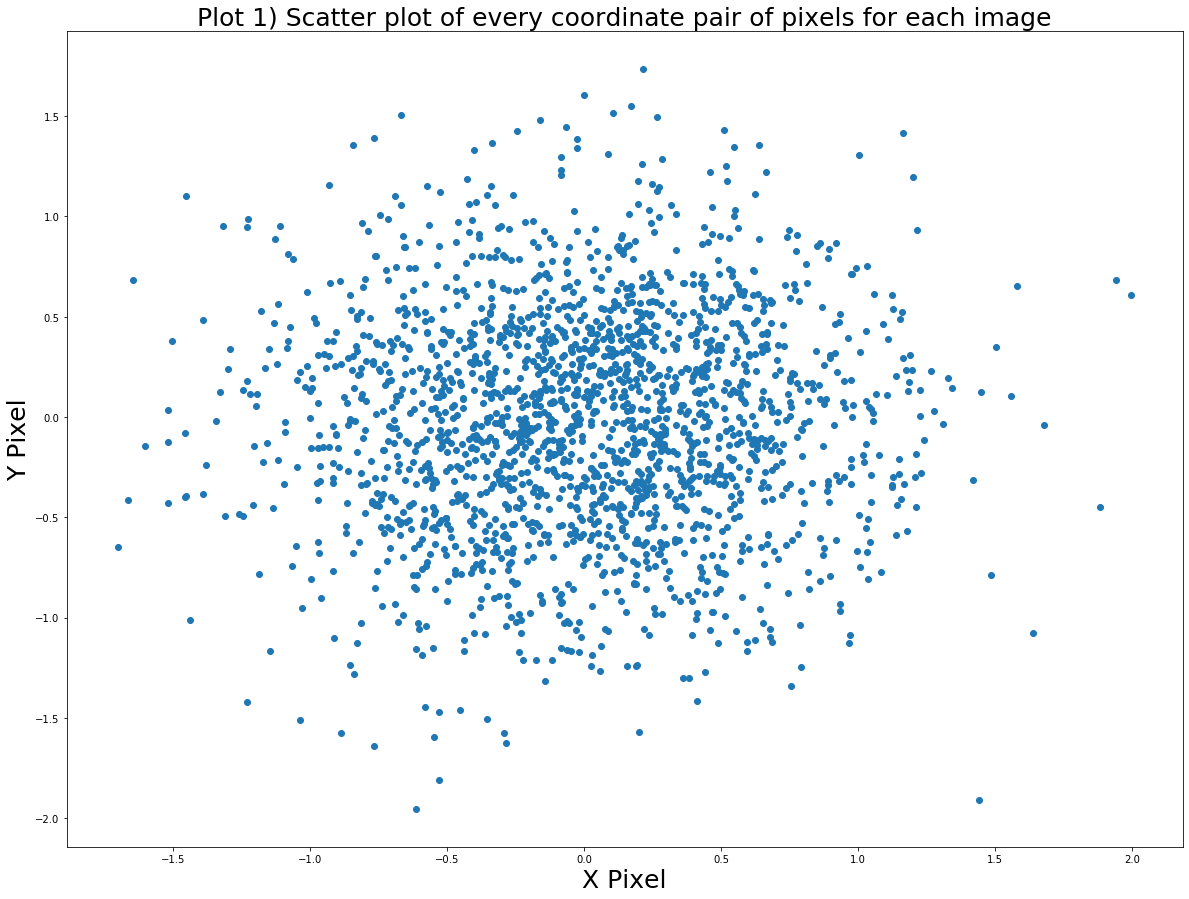

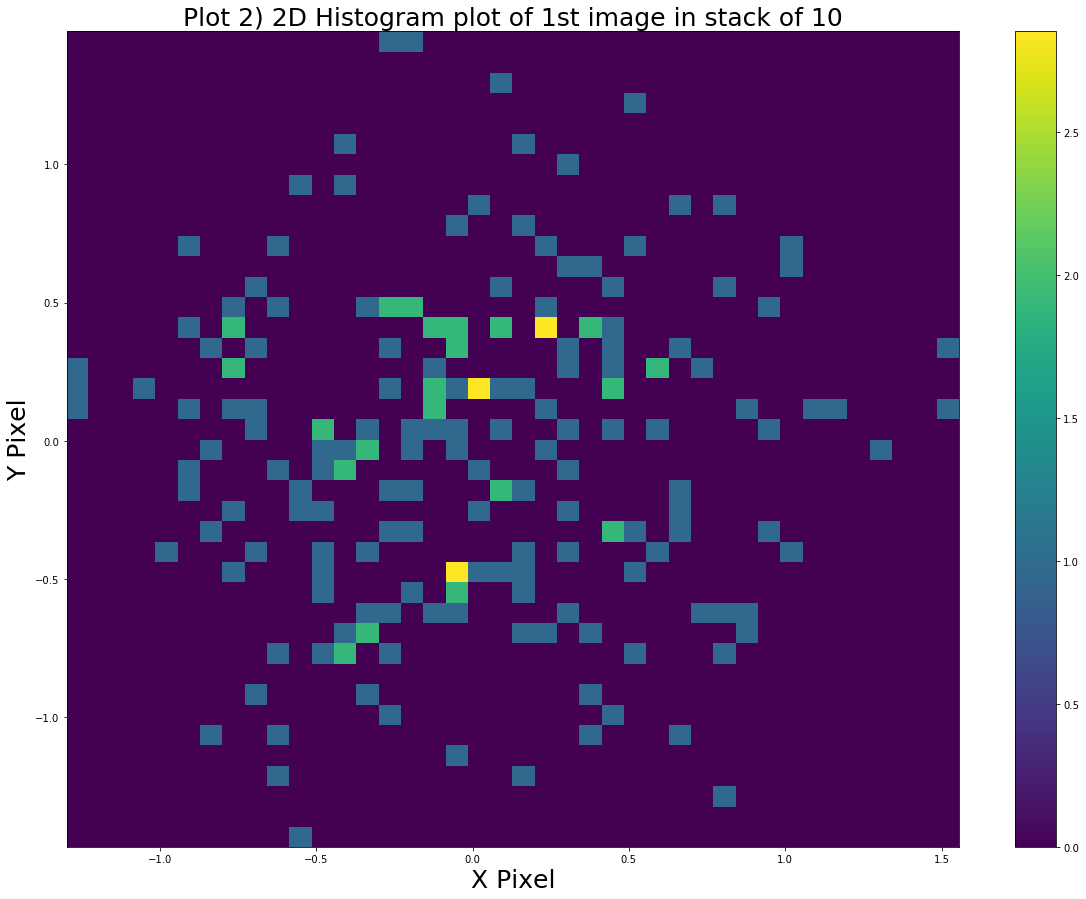

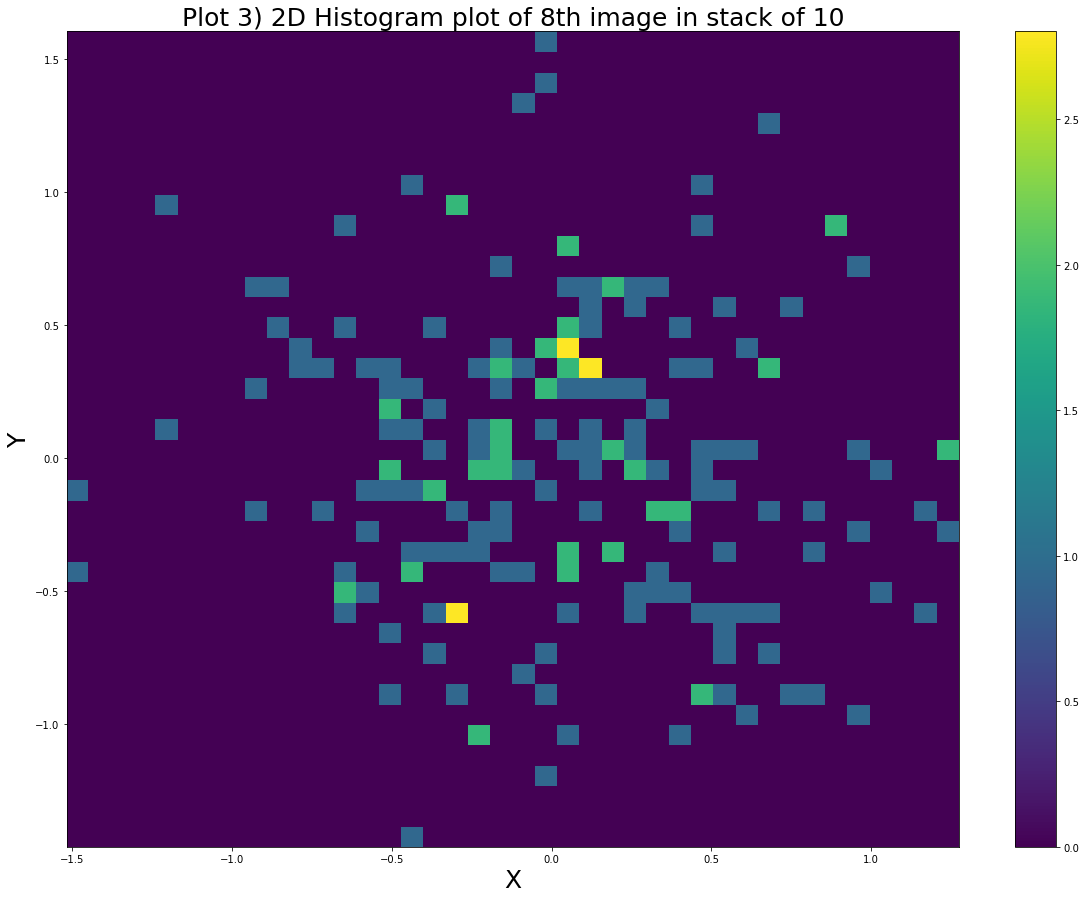

In [34]:
xstack = stack[0,:,:]
ystack = stack[:,0,:]
# says xstack is ARRAY[all values from the zeroeth column of the stack: regardless of Y value : in all 10 inner arrays]
# says ystack is ARRAY[regardless of X value : all values from the zeroeth row of the stack : in all 10 inner arrays]

fig, ax1 = plt.subplots(1,1)
Rall = ax1.scatter(xstack, ystack)
ax1.set_xlabel('X Pixel', size=25)
ax1.set_ylabel('Y Pixel', size=25)
ax1.set_title('Plot 1) Scatter plot of every coordinate pair of pixels for each image', size=25)

fig, ax2 = plt.subplots(1,1)
r1 = ax2.hist2d(stack[0,:,0], stack[:,0,0], bins=40, density=True)
ax2.set_xlabel('X Pixel', size=25)
ax2.set_ylabel('Y Pixel', size=25)
ax2.set_title('Plot 2) 2D Histogram plot of 1st image in stack of 10',size=25)
rbar1 = plt.colorbar(r1[3], ax=ax2)

fig, ax3 = plt.subplots(1,1)
r8 = ax3.hist2d(stack[0,:,7], stack[:,0,7], bins=40, density=True)
ax3.set_xlabel('X', size=25)
ax3.set_ylabel('Y', size=25)
ax3.set_title('Plot 3) 2D Histogram plot of 8th image in stack of 10',size=25)
rbar8 = plt.colorbar(r8[3], ax=ax3)
plt.show()

- Looking at the image stack data, there are a total of 40000 pixels on each image which is equal to the product of the vertical and horizontal side sizes of the image ($200x200=40000$) so there are 40000 discrete (x,y) coordinate pairs in my 2D image, multiplied by 10 for the total number of images, for a total of 400000 complete distinct points.
- The images can be summed when each image is turned into a 2D array instead of a total 3D array of the stack. Summing each individual image's x-axis and y-axis pixel arrays together after separating them will return an array with the stacked x and y pixel arrays in 2 dimensions in a (2 x 200) array, which can then be plotted in a 2D histogram. I can then figure out intensity values based on the x and y values which correlate to the amplitude of the pixel. 
- To not skew the data towards brighter amplitudes, I want to only plot a fit for data of fainter stars. So I will only plot a histogram of stars with a certain intensity or less, such that brighter stars are excluded from the mean, but most of the total data is still considered for my distribution and fit. Then I will find a 5 sigma value to search for over the entire original distribution to see if there are any actual detections that are verifiable.

### Problem 2.3)

200 200


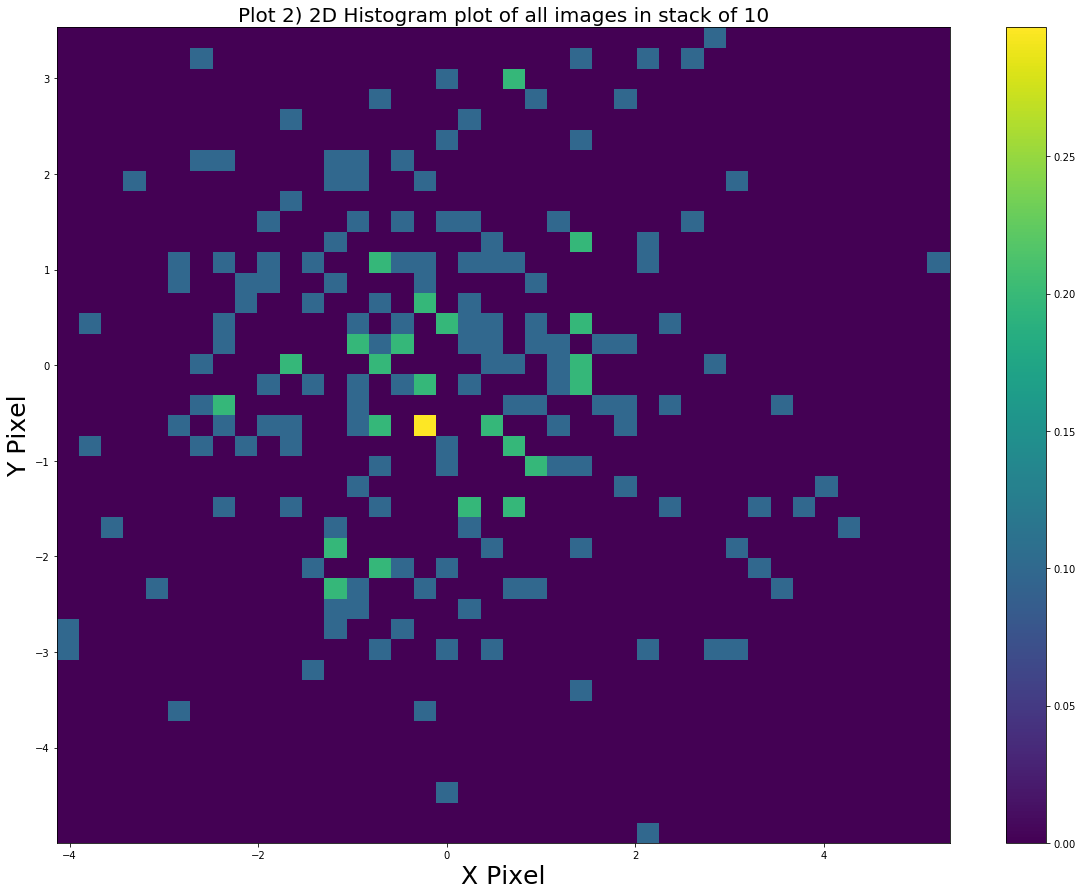

In [33]:
xsum = 0
ysum = 0
for i in range(9):
    xsum = xsum + stack[0,:,i]
    ysum = ysum + stack[:,0,i]
R = np.vstack((xsum,ysum))
fig, ax = plt.subplots(1,1)
rsum = ax.hist2d(R[0,:], R[1,:], bins=40, density=True)
ax.set_xlabel('X Pixel', size=25)
ax.set_ylabel('Y Pixel', size=25)
ax.set_title('Plot 2) 2D Histogram plot of all images in stack of 10', size=20)
rbarsum = plt.colorbar(rsum[3], ax=ax)
print(len(xsum), len(ysum))

Intensity Data Gamma Fit Parameters:
    alpha = 2.9344627524911706
    loc = 0.03500824159182596
    scale = 0.7126967907637409


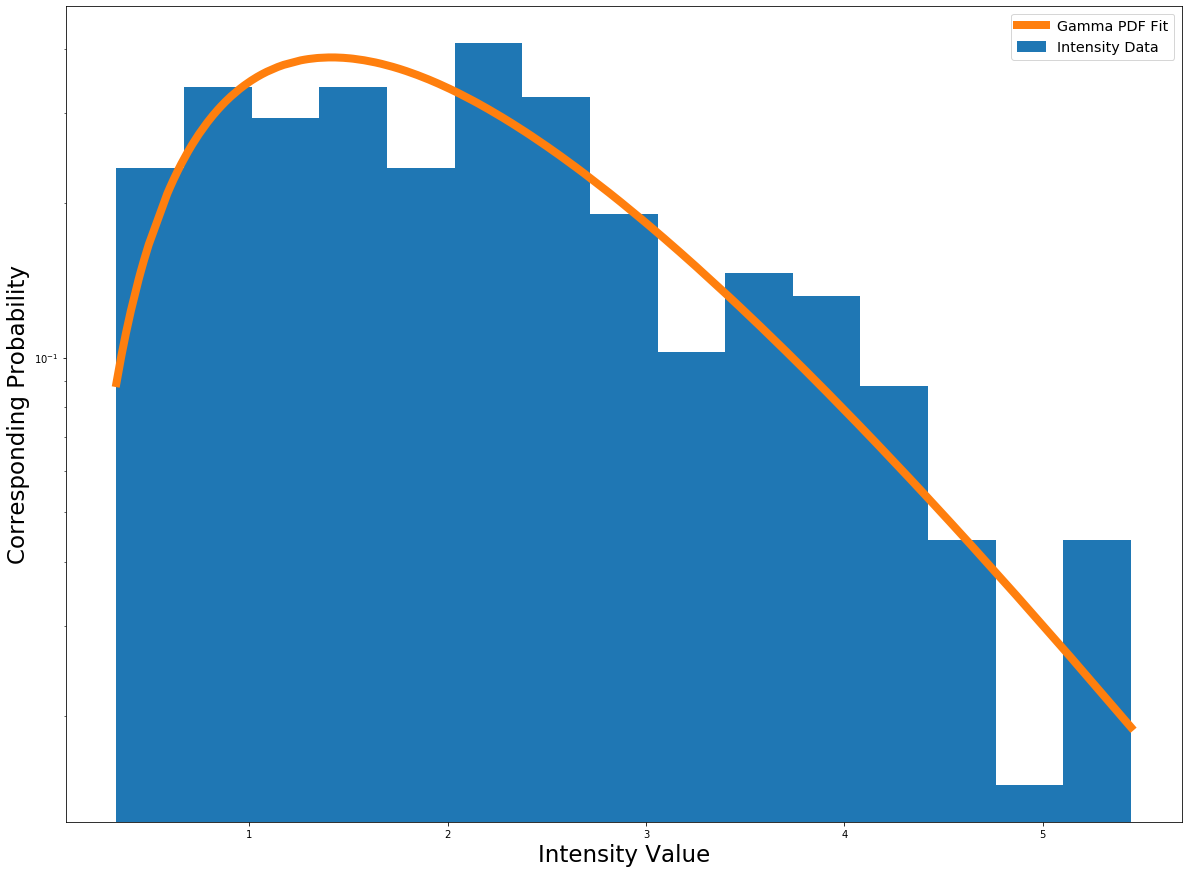

In [32]:
def amplitude(x, y):
    result = np.sqrt(x**2 + y**2)
    return result

amp = np.sort(amplitude(xsum, ysum))

fig, ax = plt.subplots(1,1)
plt.yscale('log')

ax.hist(amp, 15, density=True, label='Intensity Data')
ax.set_xlabel('Intensity Value', size=23)
ax.set_ylabel('Corresponding Probability', size=23)

fit_alphaR, fit_locR, fit_betaR=stats.gamma.fit(amp)
print('Intensity Data Gamma Fit Parameters:')
print(f'    alpha = {fit_alphaR}')
print(f'    loc = {fit_locR}')
print(f'    scale = {fit_betaR}')

xaxis = np.sort(np.linspace(0,6,100000))
ax.plot(amp, stats.gamma.pdf(amp, a=fit_alphaR, loc=fit_locR, scale=fit_betaR), 
        lw=8, label='Gamma PDF Fit')

ax.legend(loc='best', fontsize='x-large')
plt.show()

- I now have a PDF for the entirety of the data, but I want to distinguish between measurement data and background data, so I need to decide where to search for the highest intensity stars.
- Since the stars I'm looking for are probably going to found towards the right limit of the distribution at the highest intensity values, I want to consider most of the data to the left of that area as background noise. I will set my background as all data with an intensity of the mean intensity plus one standard deviation to the right as faint background stars, and anything else might be a possible detection.

Intensity Data Gamma Fit Parameters:
    alpha = 3229981.799372618
    loc = -1419.924721301767
    scale = 0.00044014900934131914


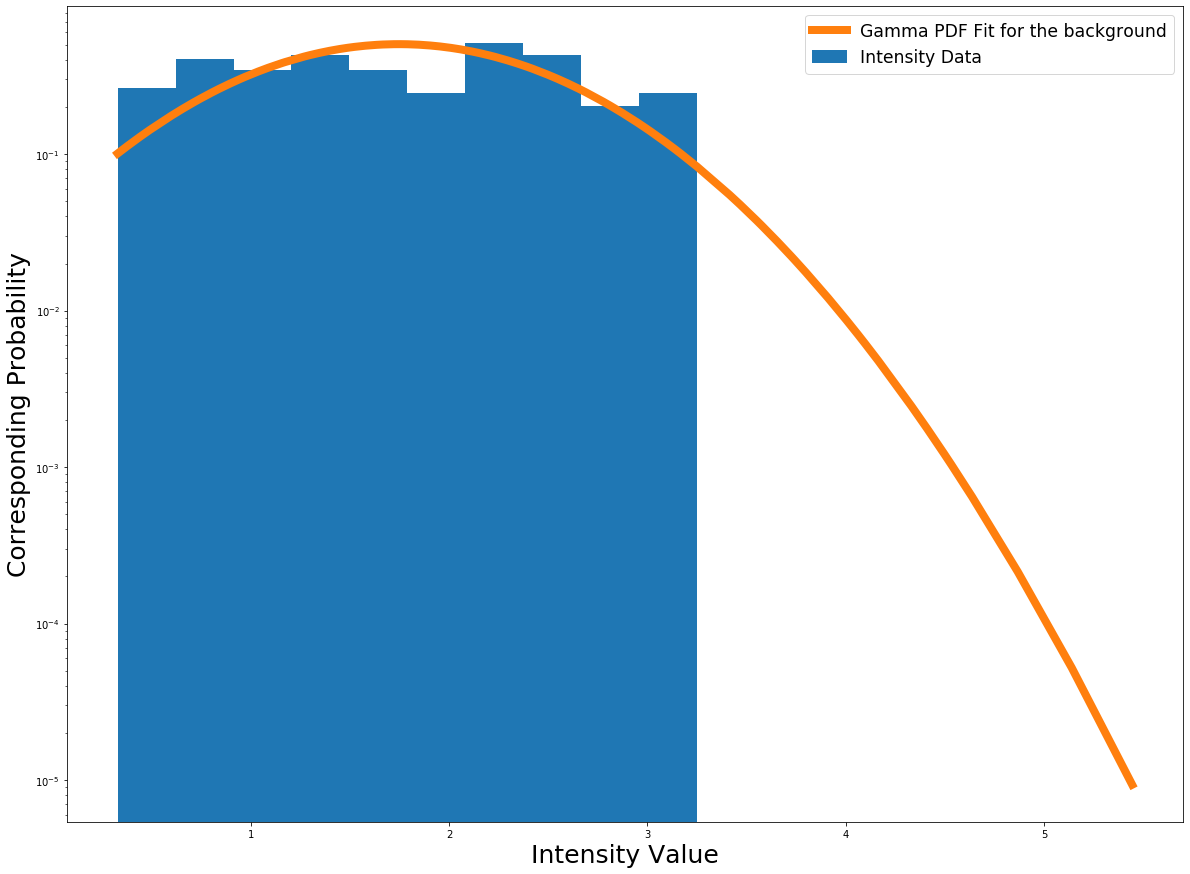

In [31]:
amp2 = []
for i in range(len(amp)):
    if amp[i] < amp.mean()+amp.std():
        amp2.append(amp[i])

fig, ax = plt.subplots(1,1)
plt.yscale('log')

ax.hist(amp2, bins=10, density=True, label='Intensity Data')
ax.set_xlabel('Intensity Value', size=25)
ax.set_ylabel('Corresponding Probability', size =25)

fit_alphaR2, fit_locR2, fit_betaR2=stats.gamma.fit(amp2)
print('Intensity Data Gamma Fit Parameters:')
print(f'    alpha = {fit_alphaR2}')
print(f'    loc = {fit_locR2}')
print(f'    scale = {fit_betaR2}')

xaxis = np.sort(np.linspace(0,6,100000))
ax.plot(amp, stats.gamma.pdf(amp, a=fit_alphaR2, loc=fit_locR2, scale=fit_betaR2), 
        lw=8, label='Gamma PDF Fit for the background')

ax.legend(loc='best', fontsize='xx-large')
plt.show()

- The background above is every measurement that is most likely not a transient star or other type of bright star. I can calculate a sigma value for finding a bright star detection in this distribution and then apply that value to my amplitude data for the original data set to find any candidates. 

In [27]:
sigma5 = 1-stats.norm.cdf(5, loc=0, scale=1)
print(sigma5)
print(f'Probability for finding a very bright star is to find a higher intensity measurement as a 5 sigma detection which has a probability value of {sigma5}')

total5 = stats.gamma.ppf(1-sigma5, loc=fit_locR2, a=fit_alphaR2, scale=fit_betaR2)
print(total5)
print(f'The intensity value of any star based on its pixel values would need to be greater than or equal to {total5} in order to be considered a legitimate detection as a transient detection')

2.866515719235352e-07
Probability for finding a very bright star is to find a higher intensity measurement as a 5 sigma detection which has a probability value of 2.866515719235352e-07
5.707301722091415
The intensity value of any star based on its pixel values would need to be greater than or equal to 5.707301722091415 in order to be considered a legitimate detection as a transient detection


- My results say that any detection higher than 5.7073 intensity is a 5 sigma detection for my data set. If I apply this value to my data, I can find any stars that have a higher intensity than my 5 sigma threshhold. 

In [28]:
amp3=[]
for i in range(len(amp)):
    if amp[i] >= 5.7073:
        amp3.append(amp[i])
    
    if amp[i] >= 5.7073:
        print(amp[i])
amp3

[]

- No values in my amplitude array were found to be greater than 5.7073, therefore no transient stars exist within my image data of 10 images. 

### Problem 2.4)
- My data is composed of both background data and signal data. Depending on what I am looking for decides what I need to consider as signal data or background noise. I looked for different objects than my partner so our backgrounds were defined differently. This resulted in different background PDFs which found us different 5 sigma detection values.